## 1. Introduction
This project analyzes the CMS Open Payments dataset for the 2023 fiscal year. The Open Payments program is a national initiative to increase transparency in healthcare. It documents the financial relationships between drug manufacturers and healthcare providers. Our study examines the General Payments dataset on a national scale. 

Our analysis serves healthcare policy researchers, hospital administrators, or compliance teams who want to understand how industry payments to physicians are distributed and where potential concentration or conflict-of-interest risks may lie.

Our program pulls data directly from the CMS Metastore API. We use a programmatic loop to handle large amounts of data. This method ensures we capture a complete set of records for our analysis.


## 2. Data Preparation
**Data Loading**

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get metadata to find the latest file URL
url = (
    "https://openpaymentsdata.cms.gov"
    "/api/1/metastore/schemas/dataset/items/"
    "fb3a65aa-c901-4a38-a813-b04b00dfa2a9"
)
params = {
    "size": 10000, 
    "offset": 0
}
r = requests.get(url, params = params)
r.raise_for_status()
meta = r.json()


In [3]:
meta["distribution"]

[{'title': 'General Payment Data – Detailed Dataset 2023 Reporting Year',
  'mediaType': 'text/csv',
  'format': 'csv',
  'downloadURL': 'https://download.cms.gov/openpayments/PGYR2023_P01232026_01102026/OP_DTL_GNRL_PGYR2023_P01232026_01102026.csv',
  'describedBy': 'https://openpaymentsdata.cms.gov/api/1/metastore/schemas/data-dictionary/items/71ec19df-f5ef-5b99-b43b-e566e22670b7',
  'describedByType': 'application/vnd.tableschema+json'}]

In [4]:
# extract the CSV download URL from the metadata
csv_url = meta["distribution"][0]["downloadURL"]

In [15]:
# specify the columns we want to load
usecols = [
    "Covered_Recipient_Profile_ID",
    "Covered_Recipient_First_Name",
    "Covered_Recipient_Last_Name",
    "Covered_Recipient_Type",
    "Covered_Recipient_Specialty_1",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Number_of_Payments_Included_in_Total_Amount",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Nature_of_Payment_or_Transfer_of_Value",
    "Recipient_State",
    "Recipient_City",
    "Recipient_Zip_Code",
    "Change_Type"
]


In [ ]:
# read the dataset in chunks to handle large file size
chunks = pd.read_csv(
    csv_url,
    usecols=usecols,
    chunksize=200_000,
    low_memory=False
)

payments_df = pd.concat(chunks, ignore_index=True)

In [ ]:
payments_df.to_csv("open_payments_IL_2023.csv", index=False)

**Quality Check & Data Processing**

In [ ]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700786 entries, 0 to 14700785
Data columns (total 15 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Change_Type                                                    object 
 1   Covered_Recipient_Type                                         object 
 2   Covered_Recipient_Profile_ID                                   float64
 3   Covered_Recipient_First_Name                                   object 
 4   Covered_Recipient_Last_Name                                    object 
 5   Recipient_City                                                 object 
 6   Recipient_State                                                object 
 7   Recipient_Zip_Code                                             object 
 8   Covered_Recipient_Specialty_1                                  object 
 9   Applicable_Manufacturer_or_Applicable_GPO_Ma

In [ ]:
payments_df.head()

,Change_Type,Covered_Recipient_Type,Covered_Recipient_Profile_ID,Covered_Recipient_First_Name,Covered_Recipient_Last_Name,Recipient_City,Recipient_State,Recipient_Zip_Code,Covered_Recipient_Specialty_1,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Total_Amount_of_Payment_USDollars,Date_of_Payment,Number_of_Payments_Included_in_Total_Amount,Nature_of_Payment_or_Transfer_of_Value,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1
0,UNCHANGED,Covered Recipient Physician,760737.0,HILARY,FRANK,MAPLE GROVE,MN,55369,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.30,09/11/2023,1,Food and Beverage,NaN
1,UNCHANGED,Covered Recipient Physician,267460.0,ANTHONY,SANDERS,INDIANAPOLIS,IN,46219-3050,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.25,08/17/2023,1,Food and Beverage,NaN
2,UNCHANGED,Covered Recipient Physician,1249653.0,MARISA,DAHLMAN,SEATTLE,WA,98101-2756,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",38.39,07/18/2023,1,Food and Beverage,NaN
3,UNCHANGED,Covered Recipient Physician,11544.0,KEVIN,HSIUNG,HENDERSON,NV,89014-4332,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",18.26,10/10/2023,1,Food and Beverage,NaN
4,UNCHANGED,Covered Recipient Physician,351192.0,SHANNON,SUTHERLAND,PERRYSBURG,OH,43551-1783,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",15.17,09/17/2023,1,Food and Beverage,NaN


In [ ]:
# convert payment date to datetime
payments_df["Date_of_Payment"] = pd.to_datetime(
    payments_df["Date_of_Payment"],
    errors="coerce"
)


In [ ]:
# check for missing values in the payment date column
payments_df["Date_of_Payment"].isna().mean()


np.float64(0.0)

In [ ]:
# check the distribution of payment amounts
payments_df["Total_Amount_of_Payment_USDollars"].describe()


count    1.470079e+07
mean     2.254341e+02
std      4.104774e+04
min      0.000000e+00
25%      1.471000e+01
50%      1.947000e+01
75%      2.756000e+01
max      8.837730e+07
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [ ]:
# check for negative or zero payment amounts
(payments_df["Total_Amount_of_Payment_USDollars"] <= 0).sum()


np.int64(3)

In [ ]:
# filter out records with non-positive payment amounts
payments_df = payments_df[payments_df["Total_Amount_of_Payment_USDollars"] > 0]


In [ ]:
# check the percentage of missing values in each column
payments_df.isna().mean().sort_values(ascending=False)


Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1         8.405770e-02
Covered_Recipient_Last_Name                                      2.159817e-03
Covered_Recipient_First_Name                                     2.142607e-03
Covered_Recipient_Profile_ID                                     2.135941e-03
Covered_Recipient_Specialty_1                                    2.135941e-03
Recipient_State                                                  4.197055e-05
Recipient_Zip_Code                                               4.197055e-05
Recipient_City                                                   6.802359e-08
Change_Type                                                      0.000000e+00
Covered_Recipient_Type                                           0.000000e+00
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name    0.000000e+00
Total_Amount_of_Payment_USDollars                                0.000000e+00
Date_of_Payment                                                 

In [ ]:
# check the distribution of categorical variables
payments_df["Change_Type"].value_counts()
payments_df["Covered_Recipient_Type"].value_counts()
payments_df["Nature_of_Payment_or_Transfer_of_Value"].value_counts().head(10)


Nature_of_Payment_or_Transfer_of_Value
Food and Beverage                                                                                                                                     13455423
Travel and Lodging                                                                                                                                      552442
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program      237680
Consulting Fee                                                                                                                                          174202
Education                                                                                                                                               163444
Gift                                                                                                                                                     31839
Honorar

In [ ]:
# standardize column names to lowercase
payments_df.columns = payments_df.columns.str.lower()


In [ ]:
# extract payment year and month for time-based analysis
payments_df["payment_year"] = payments_df["date_of_payment"].dt.year
payments_df["payment_month"] = payments_df["date_of_payment"].dt.month


In [ ]:
# rename columns to more concise names
payments_df = payments_df.rename(columns={
    "nature_of_payment_or_transfer_of_value": "payment_type",
    "total_amount_of_payment_usdollars": "payment_amount",
    "date_of_payment": "payment_date",
    "covered_recipient_specialty_1": "specialty",
    "covered_recipient_type": "recipient_type",
    "covered_recipient_profile_id": "recipient_id",
    "applicable_manufacturer_or_applicable_gpo_making_payment_name": "manufacturer",
    "number_of_payments_included_in_total_amount": "num_payments",
    "recipient_state": "state",
    "recipient_city": "city",
    "recipient_zip_code": "zip_code",
    "change_type": "change_type"
})
payments_df.head()

,change_type,recipient_type,recipient_id,covered_recipient_first_name,covered_recipient_last_name,city,state,zip_code,specialty,manufacturer,payment_amount,payment_date,num_payments,payment_type,name_of_drug_or_biological_or_device_or_medical_supply_1,payment_year,payment_month
0,UNCHANGED,Covered Recipient Physician,760737.0,HILARY,FRANK,MAPLE GROVE,MN,55369,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.30,2023-09-11,1,Food and Beverage,NaN,2023,9
1,UNCHANGED,Covered Recipient Physician,267460.0,ANTHONY,SANDERS,INDIANAPOLIS,IN,46219-3050,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.25,2023-08-17,1,Food and Beverage,NaN,2023,8
2,UNCHANGED,Covered Recipient Physician,1249653.0,MARISA,DAHLMAN,SEATTLE,WA,98101-2756,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",38.39,2023-07-18,1,Food and Beverage,NaN,2023,7
3,UNCHANGED,Covered Recipient Physician,11544.0,KEVIN,HSIUNG,HENDERSON,NV,89014-4332,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",18.26,2023-10-10,1,Food and Beverage,NaN,2023,10
4,UNCHANGED,Covered Recipient Physician,351192.0,SHANNON,SUTHERLAND,PERRYSBURG,OH,43551-1783,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",15.17,2023-09-17,1,Food and Beverage,NaN,2023,9


In [ ]:
# create a new column with the cleaned specialty names (take the last specialty if multiple are listed)
payments_df["specialty_clean"] = (
    payments_df["specialty"]
    .str.split("|")
    .str[-1]
    .str.strip()
)
payments_df.head()

,change_type,recipient_type,recipient_id,covered_recipient_first_name,covered_recipient_last_name,city,state,zip_code,specialty,manufacturer,payment_amount,payment_date,num_payments,payment_type,name_of_drug_or_biological_or_device_or_medical_supply_1,payment_year,payment_month,specialty_clean
0,UNCHANGED,Covered Recipient Physician,760737.0,HILARY,FRANK,MAPLE GROVE,MN,55369,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.30,2023-09-11,1,Food and Beverage,NaN,2023,9,Obstetrics & Gynecology
1,UNCHANGED,Covered Recipient Physician,267460.0,ANTHONY,SANDERS,INDIANAPOLIS,IN,46219-3050,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.25,2023-08-17,1,Food and Beverage,NaN,2023,8,Obstetrics & Gynecology
2,UNCHANGED,Covered Recipient Physician,1249653.0,MARISA,DAHLMAN,SEATTLE,WA,98101-2756,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",38.39,2023-07-18,1,Food and Beverage,NaN,2023,7,Gynecologic Oncology
3,UNCHANGED,Covered Recipient Physician,11544.0,KEVIN,HSIUNG,HENDERSON,NV,89014-4332,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",18.26,2023-10-10,1,Food and Beverage,NaN,2023,10,Obstetrics & Gynecology
4,UNCHANGED,Covered Recipient Physician,351192.0,SHANNON,SUTHERLAND,PERRYSBURG,OH,43551-1783,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",15.17,2023-09-17,1,Food and Beverage,NaN,2023,9,Obstetrics & Gynecology


In [32]:
# map long payment type descriptions to shorter categories
payment_type_map = {
    "Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program":
        "Non-consulting professional services",

    "Consulting Fee": "Consulting",
    "Food and Beverage": "Food & Beverage",
    "Travel and Lodging": "Travel & Lodging",
    "Royalty or License": "Royalty / License",
    "Honoraria": "Honoraria",
    "Education": "Education",
    "Grant": "Grant",
    "Acquisitions": "Acquisitions",
    "Entertainment": "Entertainment",
    "Long term medical supply or device loan": "Device / Supply Loan"
}


In [ ]:
# create a new column with the cleaned payment type categories
payments_df["payment_type_clean"] = (
    payments_df["payment_type"]
    .map(payment_type_map)
    .fillna("Other")
)


In [ ]:
# Calculate Z-scores for payment amounts to identify records that are several standard deviations away from the mean
from scipy import stats # using AI for help
import numpy as np

# We use the log of the amount because the raw data is extremely skewed
z_scores = stats.zscore(np.log1p(payments_df['payment_amount']))
outliers = payments_df[np.abs(z_scores) > 3]
outliers.head()
print(f"Number of statistical outliers detected (Z-score > 3): {len(outliers)}")
print(f"Percentage of data marked as outliers: {len(outliers) / len(payments_df) * 100:.2f}%")

Number of statistical outliers detected (Z-score > 3): 394894
Percentage of data marked as outliers: 2.69%


## 3. Payment Landscape Overview

We begin by examining where money is spent. Understanding the overall composition of payment types provides a foundation for all later analysis.

In [36]:
# define the key variables for the analysis
key_vars = [
    "payment_type",
    "payment_amount",
    "specialty",
    "recipient_type",
    "state",
    "payment_date"
]

In [ ]:
# create a summary table of total payments by cleaned payment type
payment_summary = (
    payments_df.groupby("payment_type_clean")
      .agg(
          n_payments=("payment_amount", "size"),
          total_amount=("payment_amount", "sum"),
          mean_amount=("payment_amount", "mean")
      )
      .sort_values("total_amount", ascending=False)
)

payment_summary.head(10)


,n_payments,total_amount,mean_amount
payment_type_clean,,,
Royalty / License,16313,1.197829e+09,73427.909334
Non-consulting professional services,237680,5.999067e+08,2524.009954
Consulting,174202,5.295906e+08,3040.094817
Food & Beverage,13455423,3.774955e+08,28.055269
Travel & Lodging,552442,1.839568e+08,332.988482
Grant,6481,1.134959e+08,17512.094189
Other,57430,8.617284e+07,1500.484718
Acquisitions,624,7.210692e+07,115555.958093
Education,163444,6.500881e+07,397.743611


In [38]:
# calculate the share of total payments and total amount for each payment type
payment_summary["share_of_payments"] = (
    payment_summary["n_payments"] / payment_summary["n_payments"].sum()
)

payment_summary["share_of_amount"] = (
    payment_summary["total_amount"] / payment_summary["total_amount"].sum()
)

payment_summary.sort_values("share_of_amount", ascending=False).head(10)


,n_payments,total_amount,mean_amount,share_of_payments,share_of_amount
payment_type_clean,,,,,
Royalty / License,16313,1.197829e+09,73427.909334,0.001110,0.361439
Non-consulting professional services,237680,5.999067e+08,2524.009954,0.016168,0.181019
Consulting,174202,5.295906e+08,3040.094817,0.011850,0.159801
Food & Beverage,13455423,3.774955e+08,28.055269,0.915286,0.113907
Travel & Lodging,552442,1.839568e+08,332.988482,0.037579,0.055508
Grant,6481,1.134959e+08,17512.094189,0.000441,0.034247
Other,57430,8.617284e+07,1500.484718,0.003907,0.026002
Acquisitions,624,7.210692e+07,115555.958093,0.000042,0.021758
Education,163444,6.500881e+07,397.743611,0.011118,0.019616


In [ ]:
# create a summary table of total payments by cleaned specialty
specialty_summary = (
    payments_df.groupby("specialty_clean")
      .agg(
          total_amount=("payment_amount", "sum"),
          n_payments=("payment_amount", "size")
      )
      .sort_values("total_amount", ascending=False)
)

specialty_summary.head(10)


,total_amount,n_payments
specialty_clean,,
Orthopaedic Surgery,4.068910e+08,213113
Internal Medicine,1.346184e+08,1318250
Neurology,9.068727e+07,459374
Neurological Surgery,8.792750e+07,79630
Dermatology,8.458031e+07,457005
Cardiovascular Disease,7.106804e+07,463325
Hematology & Oncology,7.090738e+07,308999
Adult Reconstructive Orthopaedic Surgery,6.736541e+07,18002
Psychiatry,6.380376e+07,308618


In [40]:
import matplotlib.pyplot as plt

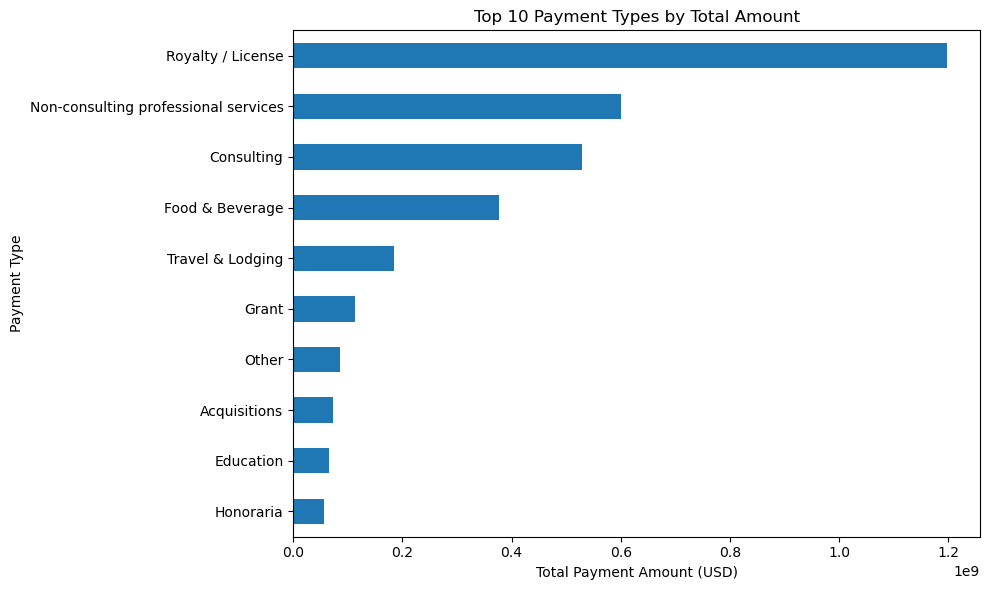

In [ ]:
# visualize the top 10 payment types by total amount
top_amount = (
    payments_df.groupby("payment_type_clean")
      ["payment_amount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
top_amount.sort_values().plot(kind="barh")
plt.xlabel("Total Payment Amount (USD)")
plt.ylabel("Payment Type")
plt.title("Top 10 Payment Types by Total Amount")
plt.tight_layout()
plt.show()


This figure shows a highly concentrated distribution of total payment amounts across payment types. Royalty and License payments dominate by a wide margin, accounting for the largest share of total dollars despite representing a relatively small number of transactions. This suggests that intellectual property–related relationships generate very large, infrequent payments compared to other categories.

In contrast, Food & Beverage and Travel & Lodging involve a massive number of payments but much smaller amounts per transaction, indicating these categories are driven by routine, low-value interactions rather than large financial transfers. Consulting and non-consulting professional services fall in between, combining moderately high payment volumes with substantial total amounts.

Overall, the figure highlights a key pattern in Open Payments data: most transactions are small and routine, but most money is concentrated in a few high-value payment categories, especially those tied to intellectual property and professional services. This distinction is important for understanding where financial influence in the healthcare industry is most economically significant.

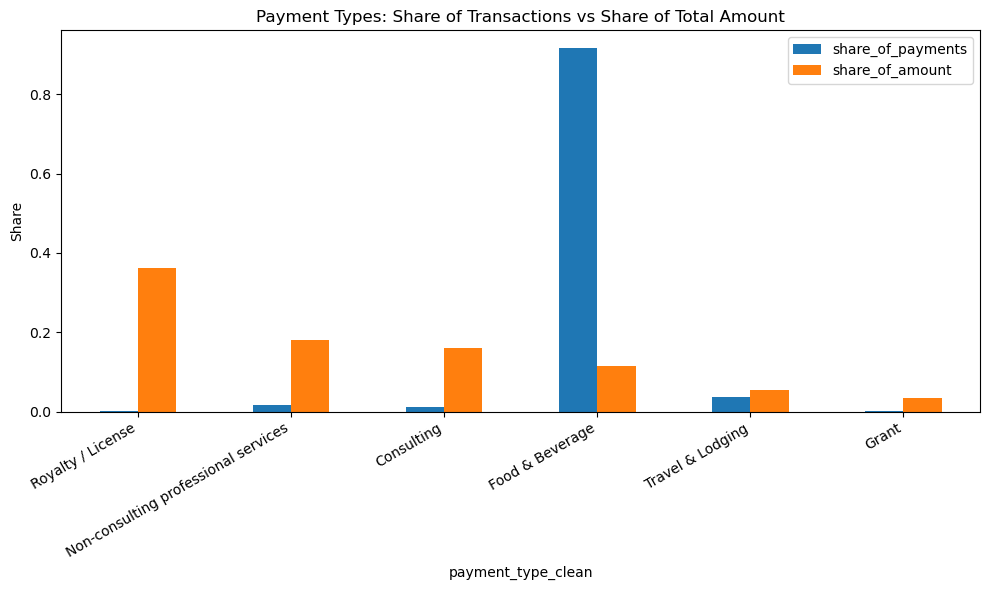

In [42]:
# visualize the share of payments vs share of total amount for the top payment types
top_idx = (
    payment_summary["share_of_amount"]
    .sort_values(ascending=False)
    .head(6)
    .index
)

compare_df = payment_summary.loc[
    top_idx,
    ["share_of_payments", "share_of_amount"]
]

compare_df.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Share")
plt.title("Payment Types: Share of Transactions vs Share of Total Amount")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

This figure compares each payment type’s share of transactions with its share of total payment dollars, revealing a sharp imbalance between payment frequency and financial magnitude. Food & Beverage accounts for the vast majority of transactions, yet represents only a relatively small share of total payment amounts. This indicates that most interactions between industry and providers are routine and low-value.

In contrast, Royalty / License, consulting, and non-consulting professional services make up a small fraction of transactions but a disproportionately large share of total dollars. These categories involve fewer, high-value payments, which concentrate financial influence despite their low frequency.

The divergence between transaction volume and dollar volume is especially important from a compliance and oversight perspective. High-frequency categories may dominate administrative workload, while low-frequency, high-value payments warrant closer scrutiny due to their outsized economic significance.

## 4. Physician-Level Distribution
After identifying major payment categories, we examine who receives these payments. This helps determine whether payments are broadly distributed or concentrated among certain physicians.

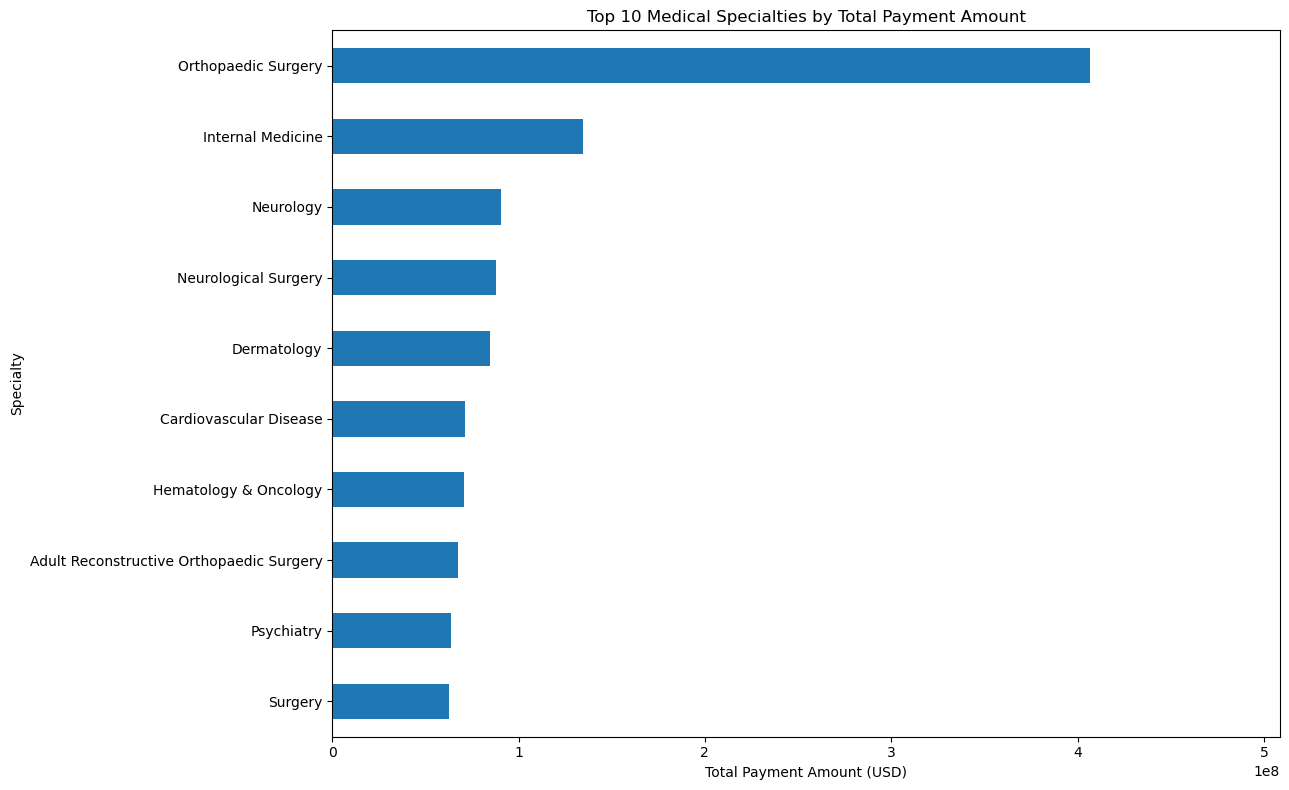

In [43]:
# visualize the top 10 medical specialties by total payment amount
fig, ax = plt.subplots(figsize=(13, 8))

top_specialties = specialty_summary.head(10)

top_specialties.sort_values("total_amount").plot(
    y="total_amount",
    kind="barh",
    ax=ax,
    legend=False
)

ax.set_xlabel("Total Payment Amount (USD)")
ax.set_ylabel("Specialty")
ax.set_title("Top 10 Medical Specialties by Total Payment Amount")

max_val = top_specialties["total_amount"].max()
ax.set_xlim(0, max_val * 1.25)

fig.tight_layout()
plt.show()


This figure shows the distribution of total payment amounts across medical specialties, highlighting substantial heterogeneity in industry payments at the specialty level. Orthopaedic Surgery stands out clearly, receiving far higher total payments than any other specialty in the top ten. This suggests that industry relationships in orthopaedics involve particularly large financial flows, likely driven by device-intensive care and intellectual property–related arrangements.

Internal Medicine, Neurology, and Dermatology follow at a distance, while the remaining specialties cluster at much lower total payment levels. The sharp drop-off after the top specialty indicates that industry payments are highly concentrated not only by payment type, but also by clinical specialty.

Taken together, this pattern suggests that financial interactions between industry and providers are not evenly distributed across the healthcare system. Instead, they are concentrated in a small set of specialties where product development, devices, and procedural care play a larger role, which may warrant closer attention from a transparency and compliance perspective.

## 5. Manufacturer Strategies
We then shift to the manufacturer perspective. Instead of asking who receives payments, we ask how companies structure their payments.

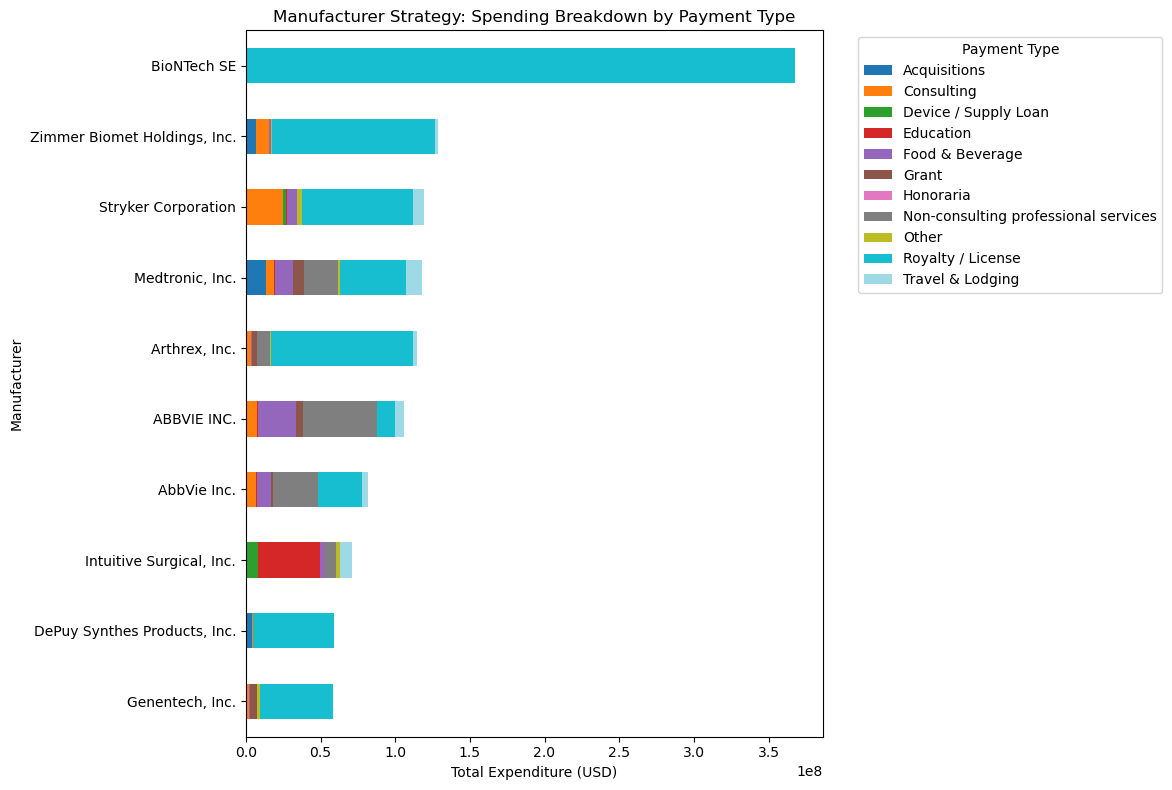

In [ ]:
# Top Manufacturer Spending Strategy
# 1. Identify the top 10 manufacturers by total expenditure
top_10_manufacturers = payments_df.groupby("manufacturer")["payment_amount"].sum().nlargest(10).index
df_top_payers = payments_df[payments_df["manufacturer"].isin(top_10_manufacturers)]

# 2. Create a pivot table: Manufacturers as rows, Payment Types as columns
pivot_df = df_top_payers.pivot_table(
    index="manufacturer", 
    columns="payment_type_clean", 
    values="payment_amount", 
    aggfunc="sum"
).fillna(0)

# 3. Sort for a cleaner visual hierarchy
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values().index]

# 4. Plotting the composition of spending
ax = pivot_df.plot(kind="barh", stacked=True, figsize=(12, 8), colormap="tab20")

ax.set_title("Manufacturer Strategy: Spending Breakdown by Payment Type")
ax.set_xlabel("Total Expenditure (USD)")
ax.set_ylabel("Manufacturer")
plt.legend(title="Payment Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This chart shows how medical device and pharmaceutical manufacturers distribute their Open Payments spending across payment types. The figure highlights differences in company strategies and physician engagement.

Several firms spend most of their budgets on royalty and license payments. BioNTech SE, Zimmer Biomet, Stryker, Arthrex, and DePuy Synthes follow this pattern. This focus suggests an emphasis on intellectual property and product development partnerships. These firms often compensate physicians for patented technologies or innovations. BioNTech SE stands out because it has the largest total spending and relies heavily on royalties and licenses.

Other firms use more diversified payment structures. AbbVie and Medtronic distribute spending across consulting, non-consulting services, and food and beverage. This pattern suggests a focus on advisory roles and relationship-building. Intuitive Surgical allocates a noticeable share to education, which likely supports physician training.

Most firms spend relatively little on travel, lodging, honoraria, and grants. These categories remain small compared to royalties or consulting. Overall, some firms prioritize innovation and IP, while others emphasize consulting and education. For policymakers and researchers, these differences matter because they reveal how companies structure financial relationships with physicians, which is central to transparency and conflict-of-interest discussions.

## 6. Structural Relationships in Payments
Next, we test whether payment patterns follow simple relationships. For example, we check whether larger payments occur more frequently or cluster in certain months.

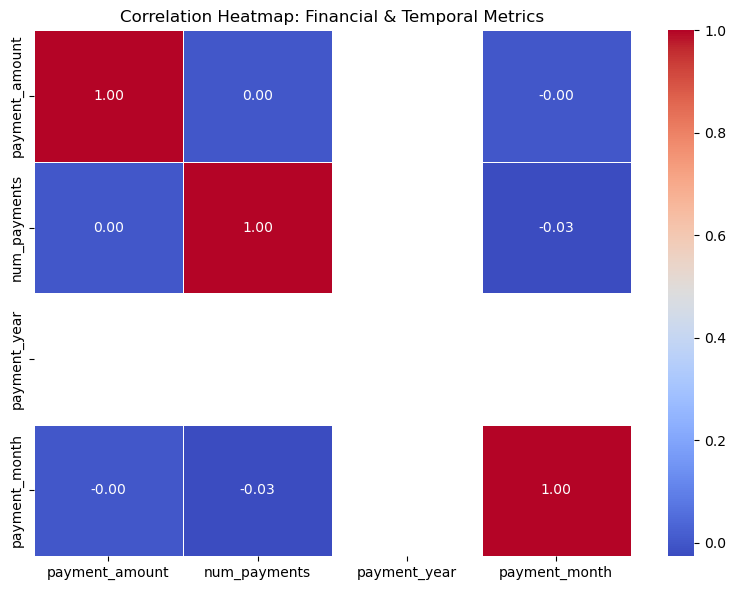

In [ ]:
# Correlation Heatmap
numeric_cols = ["payment_amount", "num_payments", "payment_year", "payment_month"]
corr_matrix = payments_df[numeric_cols].corr() # calculating the Pearson correlation coefficient between every pair of variables

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap: Financial & Temporal Metrics")
plt.tight_layout()
plt.show()

The correlation heatmap examines whether payment size, frequency, and timing move together. We include this step to test whether payment patterns follow simple structural rules, such as “more payments mean more total dollars” or “payments cluster in certain months.”

The results show almost no linear relationship among the variables. Payment amount is essentially uncorrelated with both the number of payments and the payment month. This finding suggests that how much a company pays does not systematically depend on how often or in which month they pay. The number of payments also has near-zero correlation with month, which indicates little seasonal pattern in payment frequency.

Overall, these variables operate largely independently. This result is important because it suggests that payment behavior is not driven by simple timing or frequency effects. For our target audience, this means that large payments likely reflect structured agreements or strategic relationships rather than routine or seasonal spending patterns.

## 7. Outlier and Extreme Payments

Since many financial datasets are driven by extreme values, we examine outliers separately. This helps determine whether a small number of payments distort the overall picture.

Outliers represent only 2.69% of transactions, but they account for 82.84% of the total dollar amount!


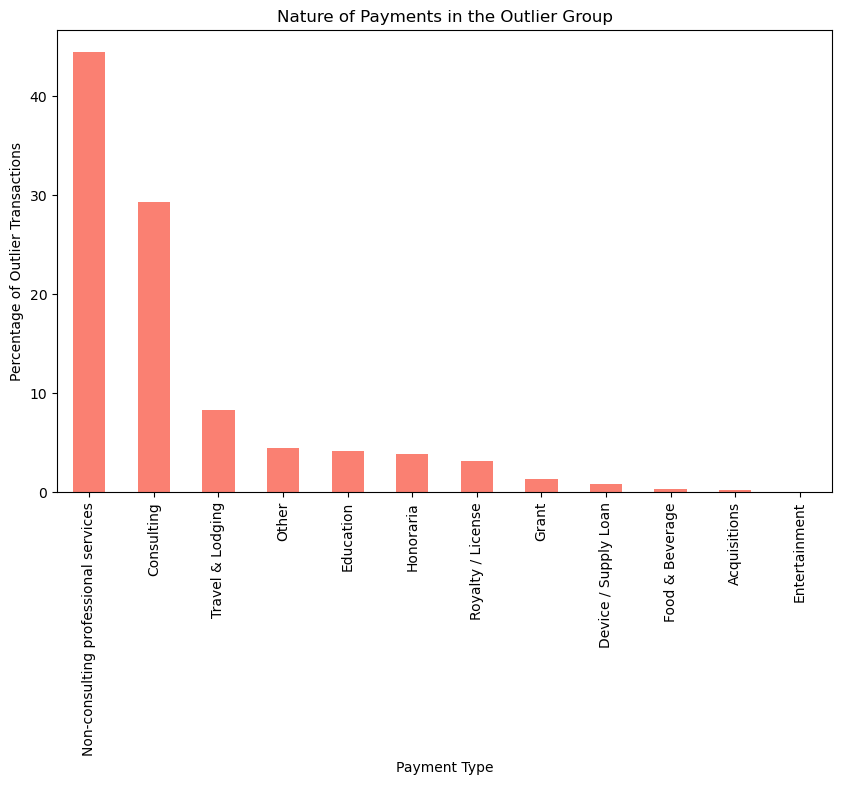

In [ ]:
# 1. Calculate the 'Weight' of Outliers
outlier_sum = outliers['payment_amount'].sum()
total_sum = payments_df['payment_amount'].sum()
outlier_count_pct = (len(outliers) / len(payments_df)) * 100
outlier_value_pct = (outlier_sum / total_sum) * 100
print(f"Outliers represent only {outlier_count_pct:.2f}% of transactions, but they account for {outlier_value_pct:.2f}% of the total dollar amount!")

# 2. Identify which payment types dominate the outliers
outlier_types = outliers['payment_type_clean'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
outlier_types.plot(kind='bar', color='salmon')
plt.title("Nature of Payments in the Outlier Group")
plt.ylabel("Percentage of Outlier Transactions")
plt.xlabel("Payment Type")
plt.xticks(rotation=90)
plt.show()

This chart focuses on the nature of payments within the outlier group. We conduct this analysis after observing overall distributions to check whether extreme payments follow the same patterns as typical payments. This step helps determine whether a small number of unusual transactions shape the overall spending landscape.

Non-consulting professional services make up the largest share of outlier transactions, at roughly 45%. This result suggests that very large payments often occur when physicians provide specialized professional services, such as speaking, research support, or technical expertise. Consulting accounts for the second largest share, at about 30%. This pattern indicates that high-value advisory relationships also generate many extreme payments.

Travel and lodging represent a much smaller share, under 10%. Categories such as education, honoraria, and royalties each contribute only small percentages. Grants, device or supply loans, food and beverage, acquisitions, and entertainment rarely appear among outliers.

Overall, outliers concentrate in service-related payments rather than in routine or low-value categories. This pattern suggests that extreme payment values are more likely to come from formal professional engagements. For policymakers and journalists, this distinction is important because it separates everyday operational payments from large, relationship-based transactions that may carry greater influence or scrutiny.

In [17]:
resp = requests.get(csv_url, stream=True, timeout=30, allow_redirects=True)
print("STATUS:", resp.status_code)
print("FINAL URL:", resp.url)
print("CONTENT-TYPE:", resp.headers.get("Content-Type"))
first_bytes = next(resp.iter_content(chunk_size=2048))
print("FIRST 200 BYTES:", first_bytes[:200])

STATUS: 200
FINAL URL: https://download.cms.gov/openpayments/PGYR2023_P01232026_01102026/OP_DTL_GNRL_PGYR2023_P01232026_01102026.csv
CONTENT-TYPE: application/octet-stream
FIRST 200 BYTES: b'Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Covered_Recipient_Profile_ID,Covered_Recipient_NPI,Covered_Recipient_First_Name,Covered_Recipient_M'


In [18]:
sample_path = "phase4_sample.csv"
max_lines = 20_000  # try 5_000 if you want smaller

with requests.get(csv_url, stream=True, timeout=120) as r:
    r.raise_for_status()

    with open(sample_path, "w", encoding="utf-8", newline="") as f:
        for i, line in enumerate(r.iter_lines()):
            if not line:
                continue

            # line is bytes -> decode to str
            f.write(line.decode("utf-8", errors="replace") + "\n")

            if i >= max_lines:
                break

print("Wrote:", sample_path)

Wrote: phase4_sample.csv


In [19]:
p4_df = pd.read_csv(sample_path, low_memory=False)
print(p4_df.shape)
p4_df.head()

(19974, 91)


,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Covered_Recipient_Profile_ID,Covered_Recipient_NPI,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,...,Associated_Drug_or_Biological_NDC_4,Associated_Device_or_Medical_Supply_PDI_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Associated_Device_or_Medical_Supply_PDI_5,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,760737.0,1.952717e+09,HILARY,E,FRANK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,01/23/2026
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,267460.0,1.881881e+09,ANTHONY,L D,SANDERS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,01/23/2026
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,1249653.0,1.144498e+09,MARISA,NaN,DAHLMAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,01/23/2026
3,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,11544.0,1.255631e+09,KEVIN,NaN,HSIUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,01/23/2026
4,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,351192.0,1.740267e+09,SHANNON,R,SUTHERLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,01/23/2026


## 8. Manufacturer Concentration at the Physician Level

Finally, we examine whether industry payments are broadly distributed across physicians or concentrated among a small subset of recipients. From a compliance perspective, concentration matters because influence risk is nonlinear: a small number of high-dollar relationships often account for a disproportionate share of total industry spending.

Due to computational constraints, this phase was conducted on a streamed local sample of the Open Payments dataset. The methodology scales directly to the full dataset and is intended to illustrate compliance-relevant patterns.

In [20]:
# 1) Keep only Phase 4 columns (lightweight)
p4_df = p4_df[
    ["Covered_Recipient_NPI",
     "Total_Amount_of_Payment_USDollars",
     "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name",
     "Covered_Recipient_Type",
     "Covered_Recipient_First_Name",
     "Covered_Recipient_Last_Name",
     "Recipient_State"]
].copy()

# 2) Rename to simple names
p4_df = p4_df.rename(columns={
    "Covered_Recipient_NPI": "recipient_id",
    "Total_Amount_of_Payment_USDollars": "payment_amount",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name": "manufacturer",
    "Covered_Recipient_Type": "recipient_type",
    "Covered_Recipient_First_Name": "first_name",
    "Covered_Recipient_Last_Name": "last_name",
    "Recipient_State": "state",
})

# 3) Clean
p4_df["payment_amount"] = pd.to_numeric(p4_df["payment_amount"], errors="coerce")
p4_df = p4_df.dropna(subset=["recipient_id", "payment_amount", "manufacturer"])
p4_df = p4_df[p4_df["payment_amount"] > 0].copy()

# Optional: keep only physicians (recommended for our writeup)
p4_df = p4_df[p4_df["recipient_type"].astype(str).str.contains("Physician", case=False, na=False)].copy()

# Add name column
p4_df["recipient_name"] = (p4_df["first_name"].fillna("").astype(str).str.strip() + " " +
                        p4_df["last_name"].fillna("").astype(str).str.strip()).str.strip()

p4_df.shape, p4_df.head()


((19820, 8),
    recipient_id  payment_amount           manufacturer  \
 0  1.952717e+09           13.30  Minerva Surgical, Inc   
 1  1.881881e+09           13.25  Minerva Surgical, Inc   
 2  1.144498e+09           38.39  Minerva Surgical, Inc   
 3  1.255631e+09           18.26  Minerva Surgical, Inc   
 4  1.740267e+09           15.17  Minerva Surgical, Inc   
 
                 recipient_type first_name   last_name state  \
 0  Covered Recipient Physician     HILARY       FRANK    MN   
 1  Covered Recipient Physician    ANTHONY     SANDERS    IN   
 2  Covered Recipient Physician     MARISA     DAHLMAN    WA   
 3  Covered Recipient Physician      KEVIN      HSIUNG    NV   
 4  Covered Recipient Physician    SHANNON  SUTHERLAND    OH   
 
        recipient_name  
 0        HILARY FRANK  
 1     ANTHONY SANDERS  
 2      MARISA DAHLMAN  
 3        KEVIN HSIUNG  
 4  SHANNON SUTHERLAND  )

We first aggregate total industry payments at the physician level and calculate what share of total dollars accrues to the top 1% of recipients.

Result. In our sample of 14,227 physicians, the top 1% (143 physicians) receive 81.32% of all industry payment dollars.

This extreme skew indicates a heavy-tailed distribution in which most physicians receive modest payments, while a small set of “super-recipients” accounts for the vast majority of spending. From a compliance standpoint, this suggests that uniform monitoring across all physicians is inefficient. Instead, oversight efforts should be targeted toward this narrow, high-impact group.

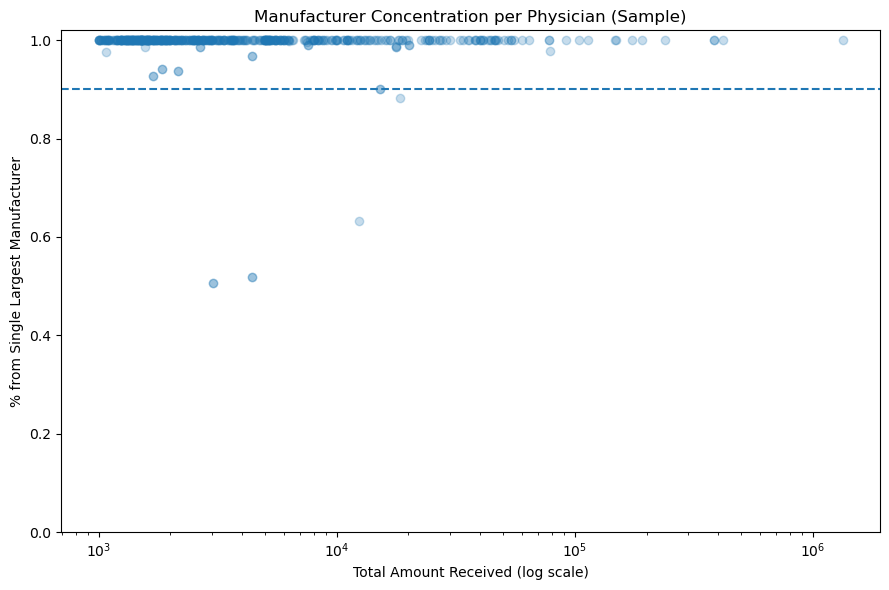

,recipient_name,recipient_id,total_received,pct_from_top_manufacturer,top_manufacturer
13546,Shawn ODriscoll,1952388324.000000,"$1,333,811",100.0%,ACUMED LLC
12903,MICHAEL GOULD,1902825847.000000,"$417,266",100.0%,"Allergan, Inc."
3360,Lirong Qu,1245205707.000000,"$385,608",100.0%,Vitalant
8608,Mark Yazer,1609842913.000000,"$385,261",100.0%,Vitalant
9432,Sally Campbell-Lee,1669430773.000000,"$239,896",100.0%,Vitalant
3067,Aaron Cohen-Gadol,1215962279.000000,"$191,563",100.0%,Kirwan Surgical Products LLC
12562,KERRY SOLOMON,1881608024.000000,"$173,250",100.0%,Carl Zeiss Meditec Digital Innovations LLC
13417,BETTE LAZZARO,1942334040.000000,"$148,839",100.0%,"Allergan, Inc."
12768,ROBERT KNETSCHE,1891805982.000000,"$147,435",100.0%,"Choice Spine, LLC"
5977,David Armstrong,1427160902.000000,"$113,730",100.0%,"Podimetrics, Inc."


In [21]:
import matplotlib.pyplot as plt

pm = (
    p4_df.groupby(["recipient_id", "manufacturer"], as_index=False)
      .agg(amount_from_mfr=("payment_amount", "sum"))
)

totals = pm.groupby("recipient_id", as_index=False)["amount_from_mfr"].sum().rename(columns={"amount_from_mfr":"total_received"})
top_source = pm.sort_values(["recipient_id","amount_from_mfr"], ascending=[True, False]).drop_duplicates("recipient_id")
top_source = top_source.rename(columns={"manufacturer":"top_manufacturer", "amount_from_mfr":"top_manufacturer_amount"})

conc = totals.merge(top_source[["recipient_id","top_manufacturer","top_manufacturer_amount"]], on="recipient_id", how="left")
conc["pct_from_top_manufacturer"] = conc["top_manufacturer_amount"] / conc["total_received"]

# add names
name_map = p4_df[["recipient_id","recipient_name"]].drop_duplicates()
conc = conc.merge(name_map, on="recipient_id", how="left")

# Scatter plot
min_total = 1000  # raise to 5000 if too many points
plot_df = conc[conc["total_received"] >= min_total].copy()

plt.figure(figsize=(9,6))
plt.scatter(plot_df["total_received"], plot_df["pct_from_top_manufacturer"], alpha=0.25)
plt.xscale("log")
plt.ylim(0, 1.02)
plt.axhline(0.9, linestyle="--")
plt.title("Manufacturer Concentration per Physician (Sample)")
plt.xlabel("Total Amount Received (log scale)")
plt.ylabel("% from Single Largest Manufacturer")
plt.tight_layout()
plt.show()

# “Detective list”: high concentration (>=90%) and high dollars
flag = conc[conc["pct_from_top_manufacturer"] >= 0.90].sort_values("total_received", ascending=False)

display(flag[["recipient_name","recipient_id","total_received","pct_from_top_manufacturer","top_manufacturer"]]
        .head(25)
        .style.format({"total_received":"${:,.0f}", "pct_from_top_manufacturer":"{:.1%}"}))


Next, we examine whether physicians’ industry payments are diversified across multiple manufacturers or dominated by a single company. For each physician, we calculate the percentage of total payments attributable to their single largest-paying manufacturer.

Figure X plots total dollars received (log scale) against the share of funding from the largest manufacturer. Values near 1.0 on the y-axis indicate extreme concentration.

The scatter plot reveals a dense cluster of physicians with manufacturer concentration at or near 100%, even among high-dollar recipients. The accompanying table highlights multiple physicians receiving six- or seven-figure sums almost entirely from a single manufacturer.

This pattern represents a clear and intuitive compliance risk signal. High-dollar relationships dominated by one manufacturer may indicate strong financial alignment rather than diffuse, low-risk interactions such as meals or educational events.

Taken together, these findings show that industry payments are highly concentrated both across physicians and within physicians across manufacturers. A small subset of physicians receives most industry dollars, and many of those physicians rely almost entirely on a single manufacturer for their funding.

For a compliance manager, these results suggest a prioritization strategy: monitoring should focus on physicians who combine high total payments with high manufacturer concentration, as these relationships pose the greatest potential for undue influence.

## 9. Conclusion

This analysis reveals that Open Payments are highly uneven in both structure and distribution. Payments concentrate in certain types, specialties, manufacturers, and physicians. A small share of transactions and a small group of physicians account for a large portion of total dollars.

We also find that payment size is not strongly tied to timing or frequency, which suggests that structured agreements drive many large payments. Outlier analysis further shows that extreme payments are linked to professional services rather than routine expenses.

For our target audience, these findings highlight the importance of looking beyond averages. Understanding concentration, strategy, and outliers provides a clearer view of how financial relationships operate in healthcare. Such insights support more informed discussions about transparency and potential conflicts of interest.

**Future Work**
One important next step would be Geospatial Hotspot Analysis using GeoPandas. Mapping payments geographically could reveal regional clusters of financial influence. Such analysis could show whether certain cities, states, or medical hubs receive disproportionately high industry payments. This spatial perspective would be especially valuable for policymakers and journalists investigating regional influence patterns.